In [1]:
import os
import time
import numpy as np 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

from keras import backend as K
from keras.utils import multi_gpu_model
import matplotlib.pyplot as plt
import scipy.io as sio

Using TensorFlow backend.


#### Load Data from .npy

In [2]:
filename1 = 'D:\\Fan\\MRF_and_AI\\data_for_Mingdong\\Clean_T1_T2_Maps_and_Masks.mat'
filename2 = 'D:\\Fan\\MRF_and_AI\\data_for_Mingdong\\MRF_to_T1_T2\\I_aliased_for_training_25steps.mat'
T_Data = sio.loadmat(filename1); T1_maps = T_Data['Data_Clean']['T1_orig'][0][0];
T1_maps = np.transpose(T1_maps, axes = [2,0,1]);

I_aliased = sio.loadmat(filename2); I_aliased = I_aliased['I_aliased_standardized']
I_aliased = np.transpose(I_aliased, axes = [3,0,1,2]);
print(T1_maps.shape)
print(I_aliased.shape)

(38, 256, 256)
(38, 256, 256, 25)


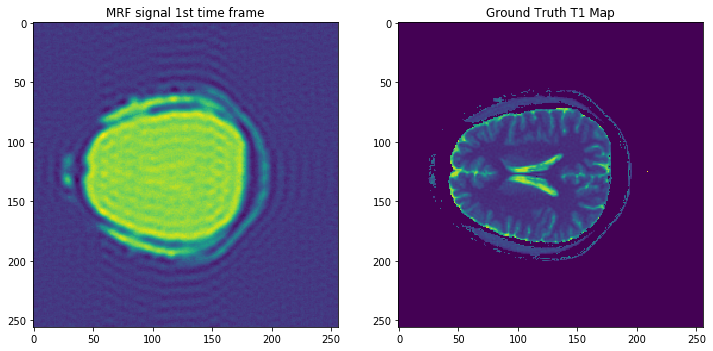

In [3]:
fig1,ax1 = plt.subplots(1,2,figsize=(12,6))
ax1[0].imshow(I_aliased[0,:,:,0]); ax1[0].set_title('MRF signal 1st time frame');
ax1[1].imshow(T1_maps[0,:,:]); ax1[1].set_title('Ground Truth T1 Map');

#### Split the data into train and test sets

In [4]:
from sklearn.model_selection import train_test_split
T1_maps = np.resize(T1_maps,(T1_maps.shape[0],256,256,1))
x_train, x_test, y_train, y_test = train_test_split(I_aliased, T1_maps, test_size=0.2)
print('training set x size:', np.shape(x_train))
print('dev set x size:', np.shape(x_dev))
print('training set y size:', np.shape(y_train))
print('dev set y size:', np.shape(y_dev))

training set x size: (30, 256, 256, 25)
dev set x size: (8, 256, 256, 25)
training set y size: (30, 256, 256, 1)
dev set y size: (8, 256, 256, 1)


##### Unet Model

In [5]:
from Unet_3D_v4 import Unet_3D

In [6]:
pretrained_weights = ''
parallel_model = Unet_3D( pretrained_weights = None, input_size = (256,256,25) )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
history = parallel_model.fit(x_train, y_train, epochs=30, batch_size=4)

Epoch 1/30
30/30 [==============================] - 2s 72ms/step - loss: 13751.0292
Epoch 2/30
30/30 [==============================] - 2s 69ms/step - loss: 13484.7402
Epoch 3/30
30/30 [==============================] - 2s 68ms/step - loss: 13321.8424
Epoch 4/30
30/30 [==============================] - 2s 67ms/step - loss: 13072.3337
Epoch 5/30
30/30 [==============================] - 2s 65ms/step - loss: 13155.7928
Epoch 6/30
30/30 [==============================] - 2s 63ms/step - loss: 13750.7794
Epoch 7/30
30/30 [==============================] - 2s 69ms/step - loss: 14927.8598
Epoch 8/30
30/30 [==============================] - 2s 67ms/step - loss: 14111.1963
Epoch 9/30
30/30 [==============================] - 2s 68ms/step - loss: 13316.5348
Epoch 10/30
30/30 [==============================] - 2s 69ms/step - loss: 13303.9540
Epoch 11/30
30/30 [==============================] - 2s 73ms/step - loss: 13563.8687
Epoch 12/30
30/30 [==============================] - 2s 67ms/step - loss: 

In [35]:
# loss and accuracy on the dev set
parallel_model.evaluate(x_dev,y_dev)

8/8 [==============================] - 0s 49ms/step


13102.826171875

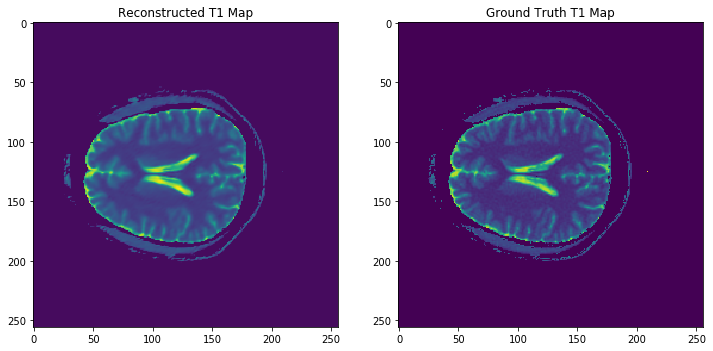

In [8]:
x_test = np.resize(I_aliased[0,:,:,:],(1,256,256,25))
y_test = T1_maps[0,:,:,0]
y_predictions = parallel_model.predict( x_test )

fig2, ax2 = plt.subplots(1,2,figsize=(12,6))
ax2[0].imshow(y_predictions[0,:,:,0]); ax2[0].set_title('Reconstructed T1 Map');
ax2[1].imshow(y_test); ax2[1].set_title('Ground Truth T1 Map');

In [ ]:
#K.clear_session()